# Sales--Time-Series-Analysis-and-sales-Forecasting

Importing important libraries

In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import datetime
import warnings
warnings.filterwarnings('ignore')


In [4]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Reading Walmart Dataset

In [5]:
store = pd.read_csv("Clean_Walmart.csv")
store.head()

,Unnamed: 0,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,USA,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,1,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,USA,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,2,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,USA,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,3,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,USA,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,4,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,USA,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


Performing Univariate Analysis

In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9995 non-null   int64  
 1   Order ID       9995 non-null   object 
 2   Order Date     9995 non-null   object 
 3   Ship Date      9995 non-null   object 
 4   Customer Name  9995 non-null   object 
 5   Country        9995 non-null   object 
 6   City           9995 non-null   object 
 7   State          9995 non-null   object 
 8   Postal Code    9995 non-null   float64
 9   Region         9995 non-null   object 
 10  Category       9995 non-null   object 
 11  Sub-Category   9995 non-null   object 
 12  Product Name   9995 non-null   object 
 13  Sales          9995 non-null   float64
 14  Quantity       9995 non-null   float64
 15  Discount       9995 non-null   float64
 16  Profit         9995 non-null   float64
dtypes: float64(5), int64(1), object(11)
memory usage: 1.

In [7]:
store.describe()

,Unnamed: 0,Postal Code,Sales,Quantity,Discount,Profit
count,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000
mean,4997.000100,55194.124962,229.876989,3.789395,0.156207,28.655969
std,2885.452478,32064.275786,623.211903,2.225070,0.206442,234.248406
min,0.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2498.500000,23223.000000,17.280000,2.000000,0.000000,1.729500
50%,4997.000000,56560.000000,54.500000,3.000000,0.200000,8.671000
75%,7495.500000,90008.000000,209.970000,5.000000,0.200000,29.364000
max,9995.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
store1 = store[['Order Date','Sales']]
store1.head()

,Order Date,Sales
0,09-11-2013,261.9600
1,09-11-2013,731.9400
2,13-06-2013,14.6200
3,11-10-2012,957.5775
4,11-10-2012,22.3680


In [9]:
store1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9995 non-null   object 
 1   Sales       9995 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [10]:
print(store1["Order Date"].min())
print(store1["Order Date"].max())

01-01-2014
31-12-2014


In [11]:
store1['Order Date']=pd.to_datetime(store1['Order Date'])

In [12]:
store1

,Order Date,Sales
0,2013-09-11,261.9600
1,2013-09-11,731.9400
2,2013-06-13,14.6200
3,2012-11-10,957.5775
4,2012-11-10,22.3680
...,...,...
9990,2014-02-27,91.9600
9991,2014-02-27,258.5760
9992,2014-02-27,258.5760
9993,2014-02-27,29.6000


In [13]:
store1 = store1.sort_values('Order Date')
store1.head()

,Order Date,Sales
3365,2011-01-02,290.666
7950,2011-01-03,129.552
8310,2011-01-03,376.509
7949,2011-01-03,63.552
157,2011-01-03,457.568


In [14]:
store1.tail()

,Order Date,Sales
908,2014-12-31,52.776
907,2014-12-31,90.930
906,2014-12-31,323.136
645,2014-12-31,209.300
1296,2014-12-31,13.904


In [15]:
store1.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [16]:
store1.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2011-01-02,290.6660
1,2011-01-03,2203.1510
2,2011-01-04,119.8880
3,2011-01-06,5188.5200
4,2011-01-07,601.0240
...,...,...
1233,2014-12-27,814.5940
1234,2014-12-28,177.6360
1235,2014-12-29,1657.3508
1236,2014-12-30,2915.5340


In [17]:
store1 = store1.set_index('Order Date')

In [18]:
store1.index

DatetimeIndex(['2011-01-02', '2011-01-03', '2011-01-03', '2011-01-03',
               '2011-01-03', '2011-01-03', '2011-01-03', '2011-01-03',
               '2011-01-03', '2011-01-03',
               ...
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=9995, freq=None)

In [19]:
start_date = '2011-01-01'
end_date = '2014-12-31'
train = store1['Sales'].loc[start_date:end_date].resample('MS').mean()

In [20]:
train.head(8)

Order Date
2011-01-01    219.113892
2011-02-01    154.469765
2011-03-01    326.785667
2011-04-01    206.789254
2011-05-01    196.357791
2011-06-01    196.551637
2011-07-01    241.281091
2011-08-01    249.068402
Freq: MS, Name: Sales, dtype: float64

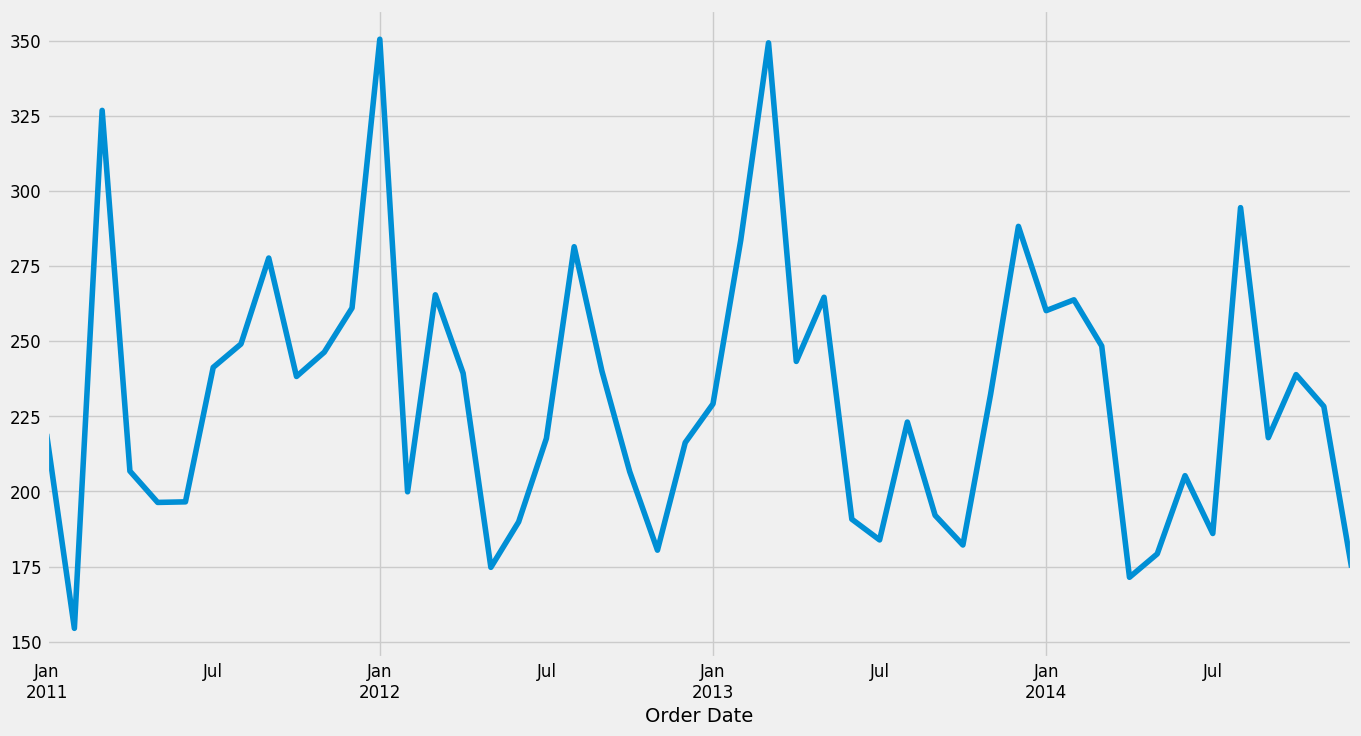

In [21]:
train.plot(figsize=(15,8));

Time-series decompositon

It allows us to decompose our time series into three distinct components

Trend

Seasonality

Noise

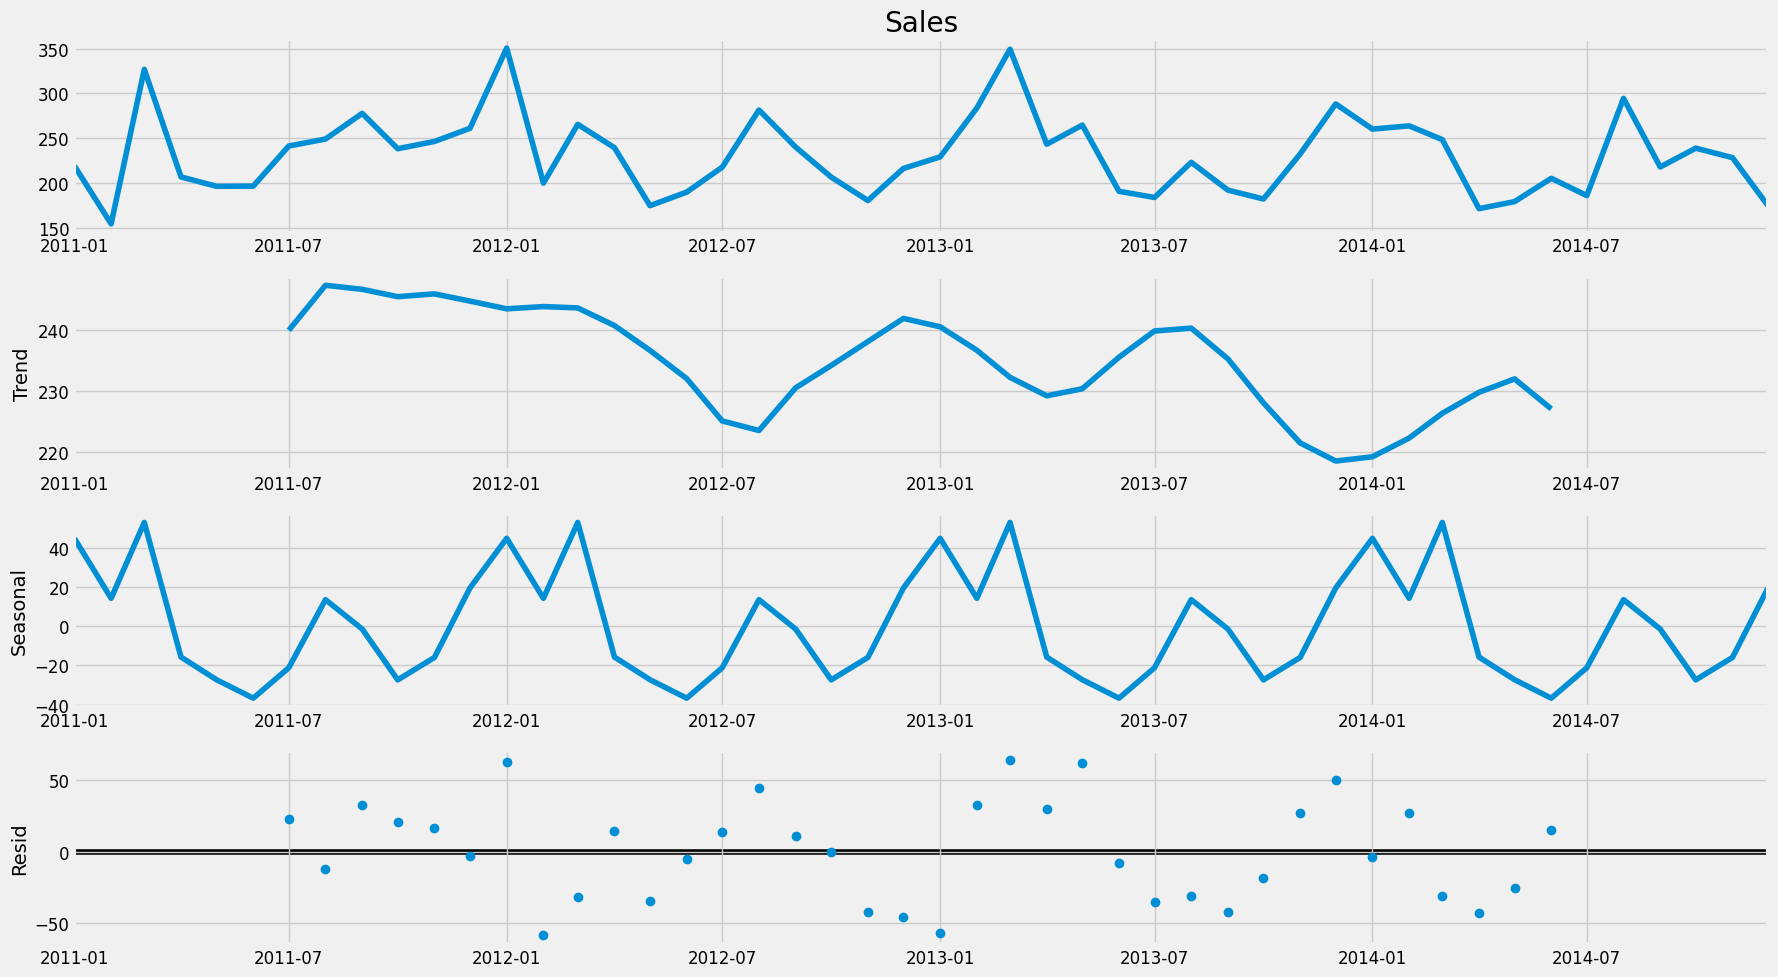

In [22]:
# Decomposition in to seasonal , trend and noise. 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

decomposition = sm.tsa.seasonal_decompose(train, model = 'additive')
fig = decomposition.plot()
plt.show()

In [23]:
start_date = '2014-01-01'
end_date = '2014-12-31'
test = store1['Sales'].loc[start_date:end_date].resample('MS').mean()

In [24]:
test.head(12)

Order Date
2014-01-01    260.162551
2014-02-01    263.765505
2014-03-01    248.406613
2014-04-01    171.445403
2014-05-01    179.244092
2014-06-01    205.258623
2014-07-01    186.020054
2014-08-01    294.436156
2014-09-01    217.899770
2014-10-01    238.881305
2014-11-01    228.291575
2014-12-01    174.681773
Freq: MS, Name: Sales, dtype: float64

In [25]:
test.shape

(12,)

# Time series forecasting with Seasonal ARIMA model

In [26]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:662.6359314266176
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2164.1410287575927
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:399.9554084577941
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:388.8983410516257
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:566.1423770405154
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:555.9483747960862
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:388.0940901410551
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:389.6517607353827
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:619.6255404764012
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1759.9574374836525
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:398.6553064058085
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:389.7497692762135
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:556.7695488618267
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:550.9051975544037
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:388.62857222735124
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:390.60613837592877
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:518.9919679398258
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1632.6308276836762
ARIMA

In [28]:
model = sm.tsa.statespace.SARIMAX(train, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()

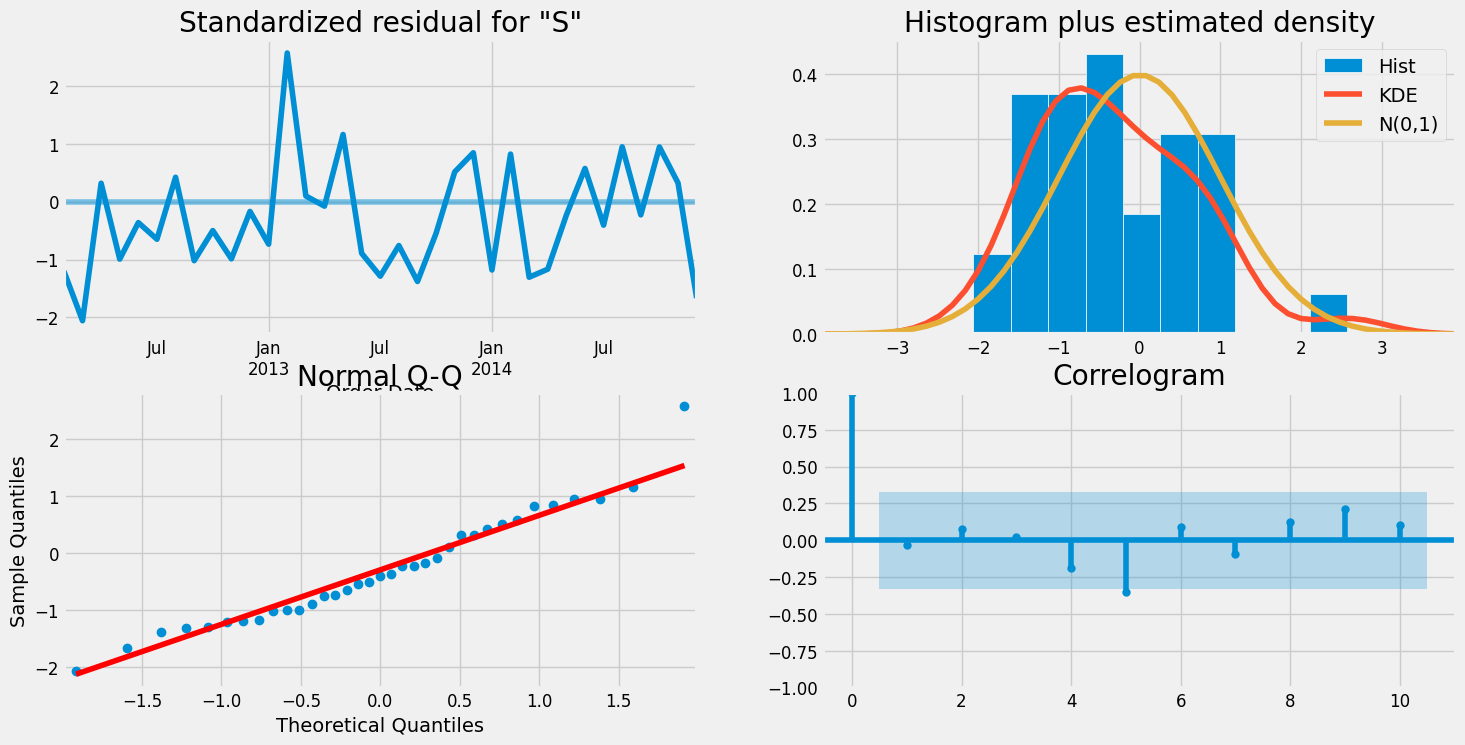

In [29]:
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [30]:
prediction = result.get_prediction(start = pd.to_datetime("2014-01-01"),end = pd.to_datetime("2014-12-31"), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
2014-01-01,222.955205,410.279750
2014-02-01,130.919135,317.912889
2014-03-01,217.291769,403.991343
2014-04-01,133.722277,320.158523
2014-05-01,97.090316,283.289472
2014-06-01,84.943915,270.928486
2014-07-01,112.355592,298.145023
2014-08-01,156.606288,342.217495
2014-09-01,135.928742,321.376535
2014-10-01,101.426801,286.724215


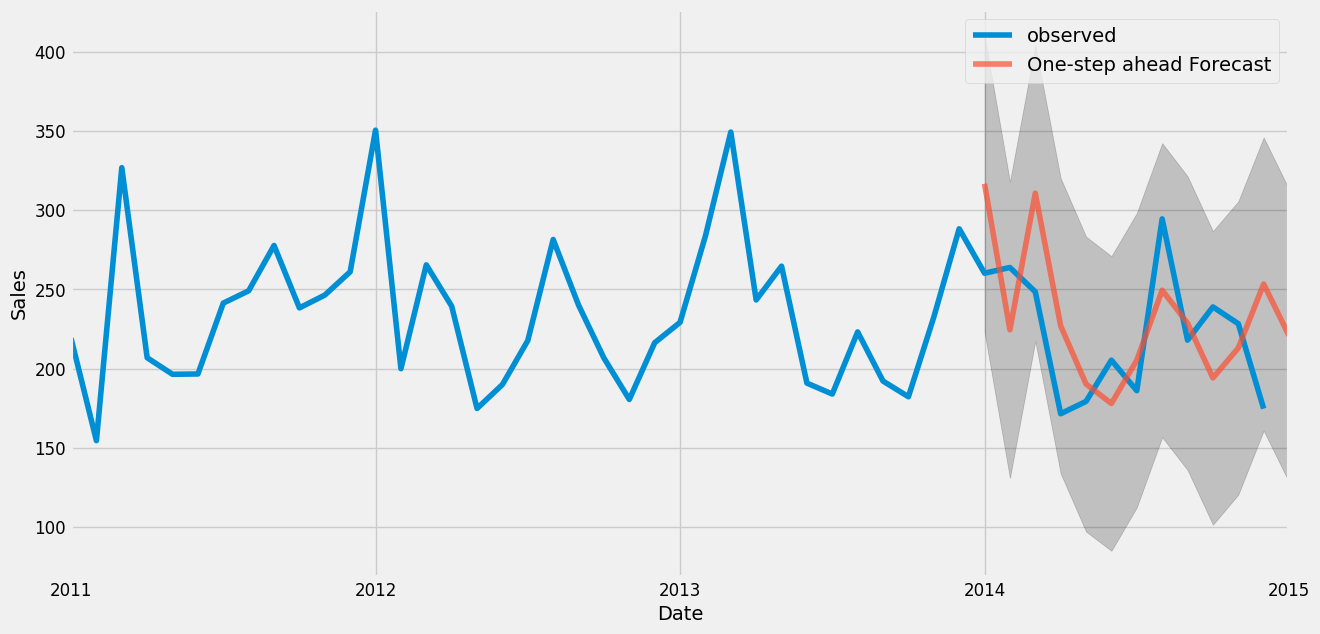

In [31]:
ax = train['2011':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index.strftime('%Y-%m-%d'), prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Sales')
plt.legend()
plt.show()

Evaluation Matrix

In [32]:
y_hat = prediction.predicted_mean
y_truth = test

mae = np.abs(y_hat - y_truth).mean()
mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)

print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Absolute Error of our forecasts is 38.8
The Mean Squared Error of our forecasts is 1957.96
The Root Mean Squared Error of our forecasts is 44.25


Forecasting For Next two years.

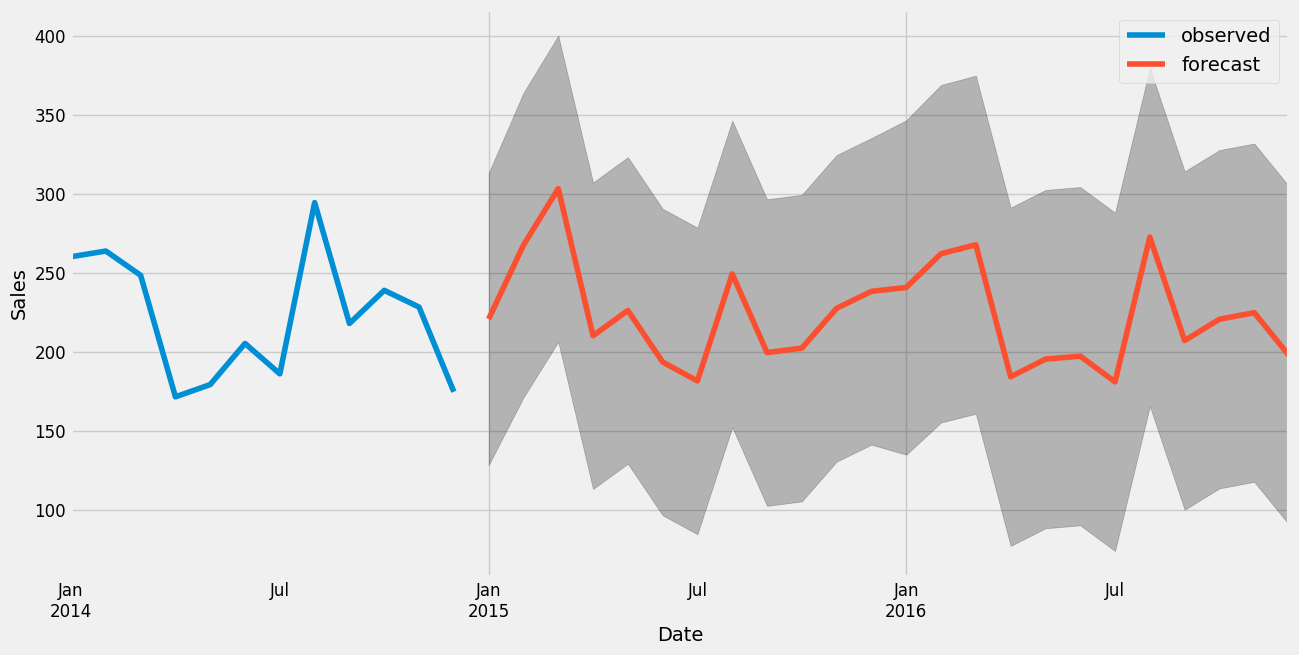

In [33]:
pred_uc = result.get_forecast(steps = 24)
pred_ci = pred_uc.conf_int()

ax = test.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [34]:
print(pred_uc.summary_frame(alpha=0.10))

Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
2015-01-01  220.718588  47.171930     143.127668     298.309508
2015-02-01  267.479017  49.210366     186.535168     348.422866
2015-03-01  303.248926  49.459118     221.895916     384.601935
2015-04-01  210.136414  49.505367     128.707333     291.565496
2015-05-01  226.143616  49.516272     144.696596     307.590636
2015-06-01  193.498674  49.519097     112.047007     274.950341
2015-07-01  181.534811  49.519874     100.081866     262.987755
2015-08-01  249.252361  49.520115     167.799021     330.705702
2015-09-01  199.479220  49.520215     118.025715     280.932724
2015-10-01  202.313915  49.520277     120.860308     283.767523
2015-11-01  227.507875  49.520330     146.054181     308.961569
2015-12-01  238.227506  49.520380     156.773730     319.681282
2016-01-01  240.695411  54.001057     151.871576     329.519246
2016-02-01  262.071738  54.518855     172.396202     351.747275
2016-03-01  267.769017  54.612481     17

# Error,Trend and Seasonality Model (ETS)

In [35]:
start_date1 = '2011-01-01'
end_date1 = '2014-12-31'
train1 = store1['Sales'].loc[start_date1:end_date1].resample('MS').mean()

In [36]:
start_date2 = '2014-01-01'
end_date2 = '2014-12-31'
test2 = store1['Sales'].loc[start_date2:end_date2].resample('MS').mean()

In [37]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [43]:
model1 = sm.tsa.ETSModel(train1, seasonal_periods=12, trend='add', seasonal='mul', error='mul',damped_trend=True)
result1 = model1.fit()

In [44]:
print(result1.summary())

                                 ETS Results                                  
Dep. Variable:                  Sales   No. Observations:                   48
Model:                      ETS(MAdM)   Log Likelihood                -236.054
Date:                Sun, 09 Apr 2023   AIC                            510.108
Time:                        18:10:10   BIC                            545.661
Sample:                    01-01-2011   HQIC                           523.543
                         - 12-01-2014   Scale                            0.021
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0001        nan        nan        nan         nan         nan
smoothing_trend          1e-08        nan        nan        nan         nan         nan
smoothing_season

In [45]:
forecast = result1.forecast(steps=12)

In [46]:
print( ' Actual Sales values:\n', test2 ,'\n\n Forecasted sales values: \n',forecast)
print('\nMean Absolute Error (MAE) of forecasts: ', np.abs(forecast - test2).mean())
print('Mean Squared Error (MSE) of forecasts: ', ((forecast - test2) ** 2).mean())
print('Root Mean Squared Error (RMSE) of forecasts: ', np.sqrt(((forecast - test2) ** 2).mean()))

 Actual Sales values:
 Order Date
2014-01-01    260.162551
2014-02-01    263.765505
2014-03-01    248.406613
2014-04-01    171.445403
2014-05-01    179.244092
2014-06-01    205.258623
2014-07-01    186.020054
2014-08-01    294.436156
2014-09-01    217.899770
2014-10-01    238.881305
2014-11-01    228.291575
2014-12-01    174.681773
Freq: MS, Name: Sales, dtype: float64 

 Forecasted sales values: 
 2015-01-01    278.150586
2015-02-01    234.836838
2015-03-01    308.855240
2015-04-01    219.390227
2015-05-01    209.120732
2015-06-01    194.821947
2015-07-01    209.296490
2015-08-01    261.736985
2015-09-01    234.063933
2015-10-01    216.255596
2015-11-01    221.439727
2015-12-01    239.116580
Freq: MS, Name: simulation, dtype: float64

Mean Absolute Error (MAE) of forecasts:  nan
Mean Squared Error (MSE) of forecasts:  nan
Root Mean Squared Error (RMSE) of forecasts:  nan


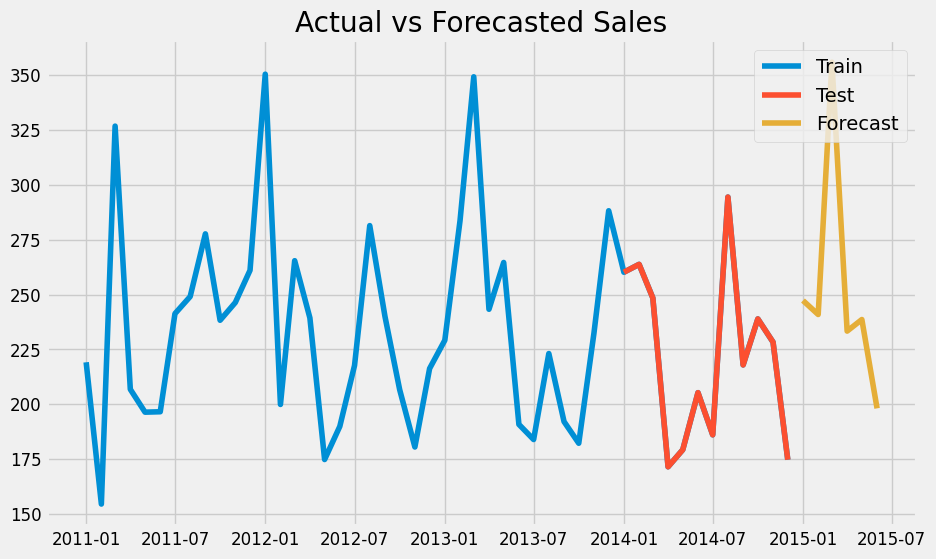

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.legend(loc='best')
plt.title('Actual vs Forecasted Sales')
plt.show()